In [26]:
!pip install pyupbit

In [27]:
import pandas as pd
from fbprophet import Prophet
import pyupbit

In [28]:
df = pyupbit.get_ohlcv("KRW-XRP", interval="minute1")

df = df.drop(["open", "high", "low", "volume", "value"], axis=1)

df = df.reset_index().rename(columns={"index": "ds"}) 
df = df.rename(columns={"close": "y"})
print(df)


                     ds       y
0   2021-08-23 15:03:00  1445.0
1   2021-08-23 15:04:00  1450.0
2   2021-08-23 15:05:00  1445.0
3   2021-08-23 15:06:00  1445.0
4   2021-08-23 15:07:00  1445.0
..                  ...     ...
195 2021-08-23 18:18:00  1495.0
196 2021-08-23 18:19:00  1500.0
197 2021-08-23 18:20:00  1495.0
198 2021-08-23 18:21:00  1495.0
199 2021-08-23 18:22:00  1500.0

[200 rows x 2 columns]


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                     ds         yhat   yhat_lower   yhat_upper
0   2021-08-23 14:39:00  1448.748468  1444.834048  1452.821871
1   2021-08-23 14:40:00  1448.393339  1444.203872  1452.825752
2   2021-08-23 14:41:00  1448.038209  1443.781988  1452.217329
3   2021-08-23 14:42:00  1447.683079  1443.323227  1451.807736
4   2021-08-23 14:43:00  1447.327950  1443.224374  1451.775289
..                  ...          ...          ...          ...
255 2021-08-23 18:54:00  1567.853328  1532.668535  1602.282672
256 2021-08-23 18:55:00  1568.768074  1532.978730  1603.830590
257 2021-08-23 18:56:00  1569.682819  1534.048878  1605.882249
258 2021-08-23 18:57:00  1570.597565  1532.809653  1607.687701
259 2021-08-23 18:58:00  1571.512310  1533.864896  1609.616583

[260 rows x 4 columns]


AttributeError: ignored

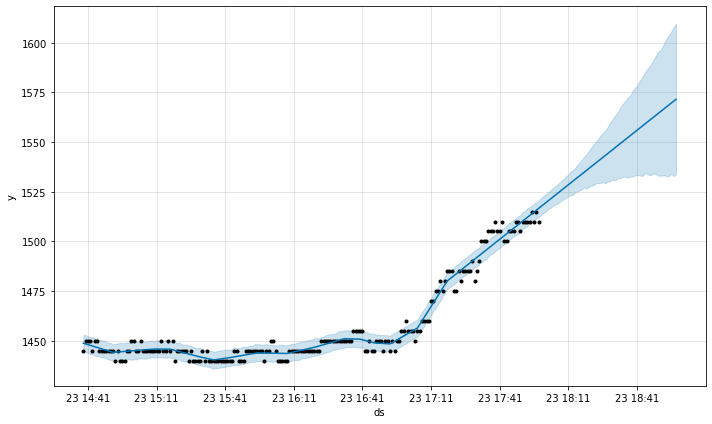

In [9]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=60, freq='min')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
fig1 = model.plot(forecast)
for cp in model.changepoints:
  fig1.axvline(cp, c='gray', ls='--', lw=2)

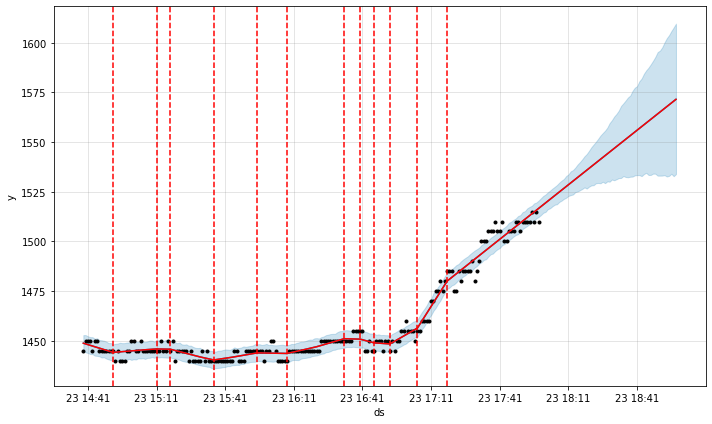

In [29]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


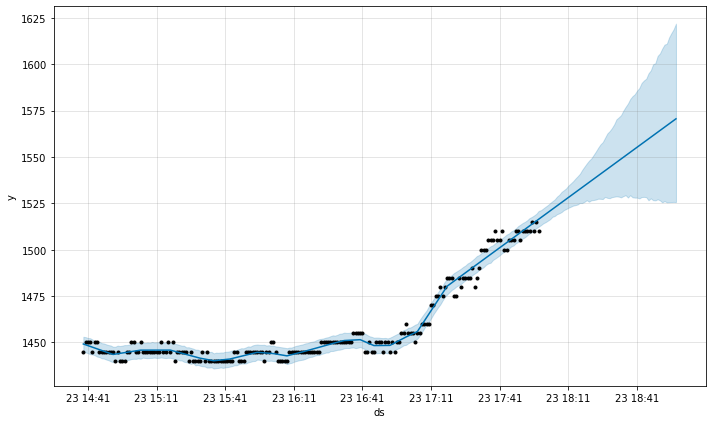

In [25]:
model2 = Prophet(changepoint_prior_scale=0.1)
forecast2 = model2.fit(df).predict(future)
fig = model2.plot(forecast2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


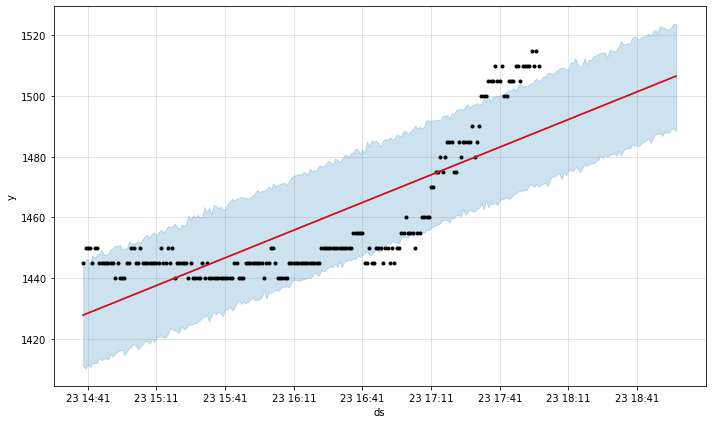

In [23]:
model3 = Prophet(changepoints=["2021-08-23 17:58:00"])
forecast3 = model3.fit(df).predict(future)
fig = model3.plot(forecast3)
a = add_changepoints_to_plot(fig.gca(), model3, forecast3)
